In [1]:
import numpy as np
import matplotlib.pyplot as plt

from CADMium import Pssolver
from CADMium import Psgrid
from CADMium import Partition
from CADMium import Inverter

a = 1.466/2
#Nuclear charge for fragments A and B
Za, Zb = 1,1
#Set polarization 1-Unpolarized, 2-Polarized|
pol = 2
#Fragment a electrons [alpha, beta]
Nmo_a = [[1,0]] #Number of molecular orbitals to calculate
N_a   = [[1,0]]
#Ensemble mix
nu_a = 1
#Fragment b electrons
Nmo_b = [[1,0]]
N_b   = [[1,0]]
#Ensemble mix
nu_b = 1

#Molecular elctron configuration
Nmo_m = [[1,1]]
N_m   = [[1,1]]

#Set up grid
NP = 7
NM = [6,6]
L = np.arccosh(12/a)
loc = np.array(range(-4,5)) #Stencil outline

grid = Psgrid(NP, NM, a, L, loc)
grid.initialize()

part = Partition(grid, Za, Zb, pol, Nmo_a, N_a, nu_a, Nmo_b, N_b, nu_b, {  "AB_SYM" : True,
                                                                           "ENS_SPIN_SYM" : True,  
                                                                           "kinetic_part_type" : "inversion",
                                                                           "k_family" : "gga",
                                                                           "ke_func_id" : 500,
                                                                            })

#Setup inverter object
mol_solver = Pssolver(grid, Nmo_m, N_m)
part.inverter = Inverter(grid, mol_solver, {  "AB_SYM"         : True,
                                              "ENS_SPIN_SYM"   : True,  
                                              "use_iterative"  : False,
                                              "invert_type"    : "orbitalinvert",
                                              "Tol_lin_solver" : 1e-3,
                                              "DISP"           : False,  
                                            })

part.scf({"disp"  : True,
          "e_tol" : 1e-7})

                Total Energy ( a.u.)                               Inversion                

                __________________                ____________________________________     

Iteration         A              B                  iters      optimality        res       

___________________________________________________________________________________________ 



/mnt/c/Users/victo/Dropbox/PHD/cadmium/CADMium/CADMium/inverter/orbitalinvert.py:355: UserWarning: 
 Convergence not reached at maximum iteration
  warnings.warn('\n Convergence not reached at maximum iteration')


    1            -0.39377        -0.39377            20       +6.716e-13      +1.000e+00
    2            -0.39952        -0.39952            20       +3.430e-15      +9.643e-01
    3            -0.44747        -0.44747            20       +4.999e-13      +8.739e-03
    4            -0.47361        -0.47361            20       +8.526e-13      +1.100e+01
    5            -0.46906        -0.46906            20       +1.030e-12      +1.101e+00
    6            -0.45729        -0.45729            20       +4.334e-15      +4.914e-03
    7            -0.45209        -0.45209            20       +5.742e-13      +1.642e+01
    8            -0.45367        -0.45367            20       +5.540e-13      +1.065e+00
    9            -0.45672        -0.45672            20       +4.395e-15      +1.481e+01
   10            -0.45782        -0.45782            20       +5.927e-15      +6.002e-03
   11            -0.45724        -0.45724            20       +3.858e-15      +1.073e+00
   12            -0.4

In [7]:
full, x,y = grid.plotter(part.V.vp[:,0])
x_axis,vp = grid.axis_plot(part.V.vp[:,0] )

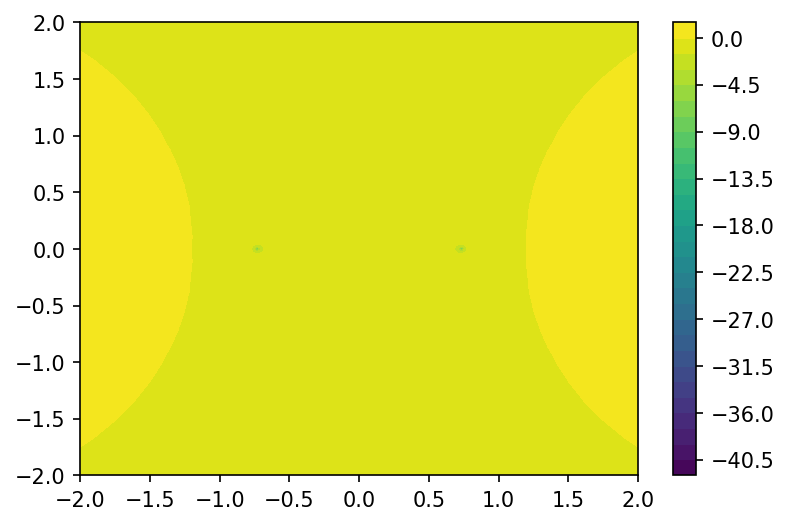

In [8]:
fig = plt.figure(dpi=150)
plt.contourf(x,y,full, levels=30, cmap="viridis")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.colorbar()

(-1.5, 1.0)

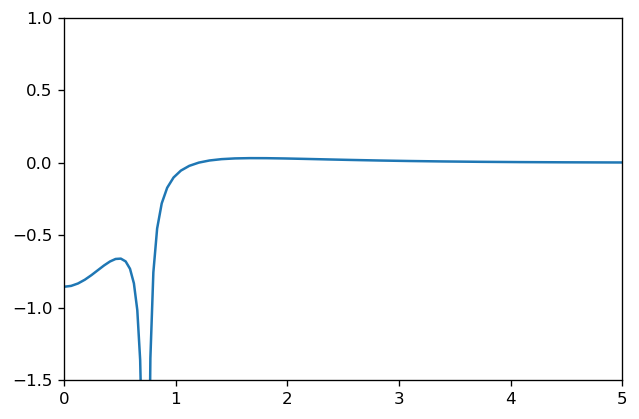

In [10]:
fig = plt.figure(dpi=120)
plt.plot(x_axis,vp)
plt.xlim([0,5])
plt.ylim([-1.5,1])

In [9]:
%matplotlib widget

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, full, cmap="viridis",
                       linewidth=0, antialiased=True)

ax.grid(False)
ax.set_facecolor("white")
fig.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …